In [53]:
# Set up codes
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.5)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Tree & Random Forest in Classfication

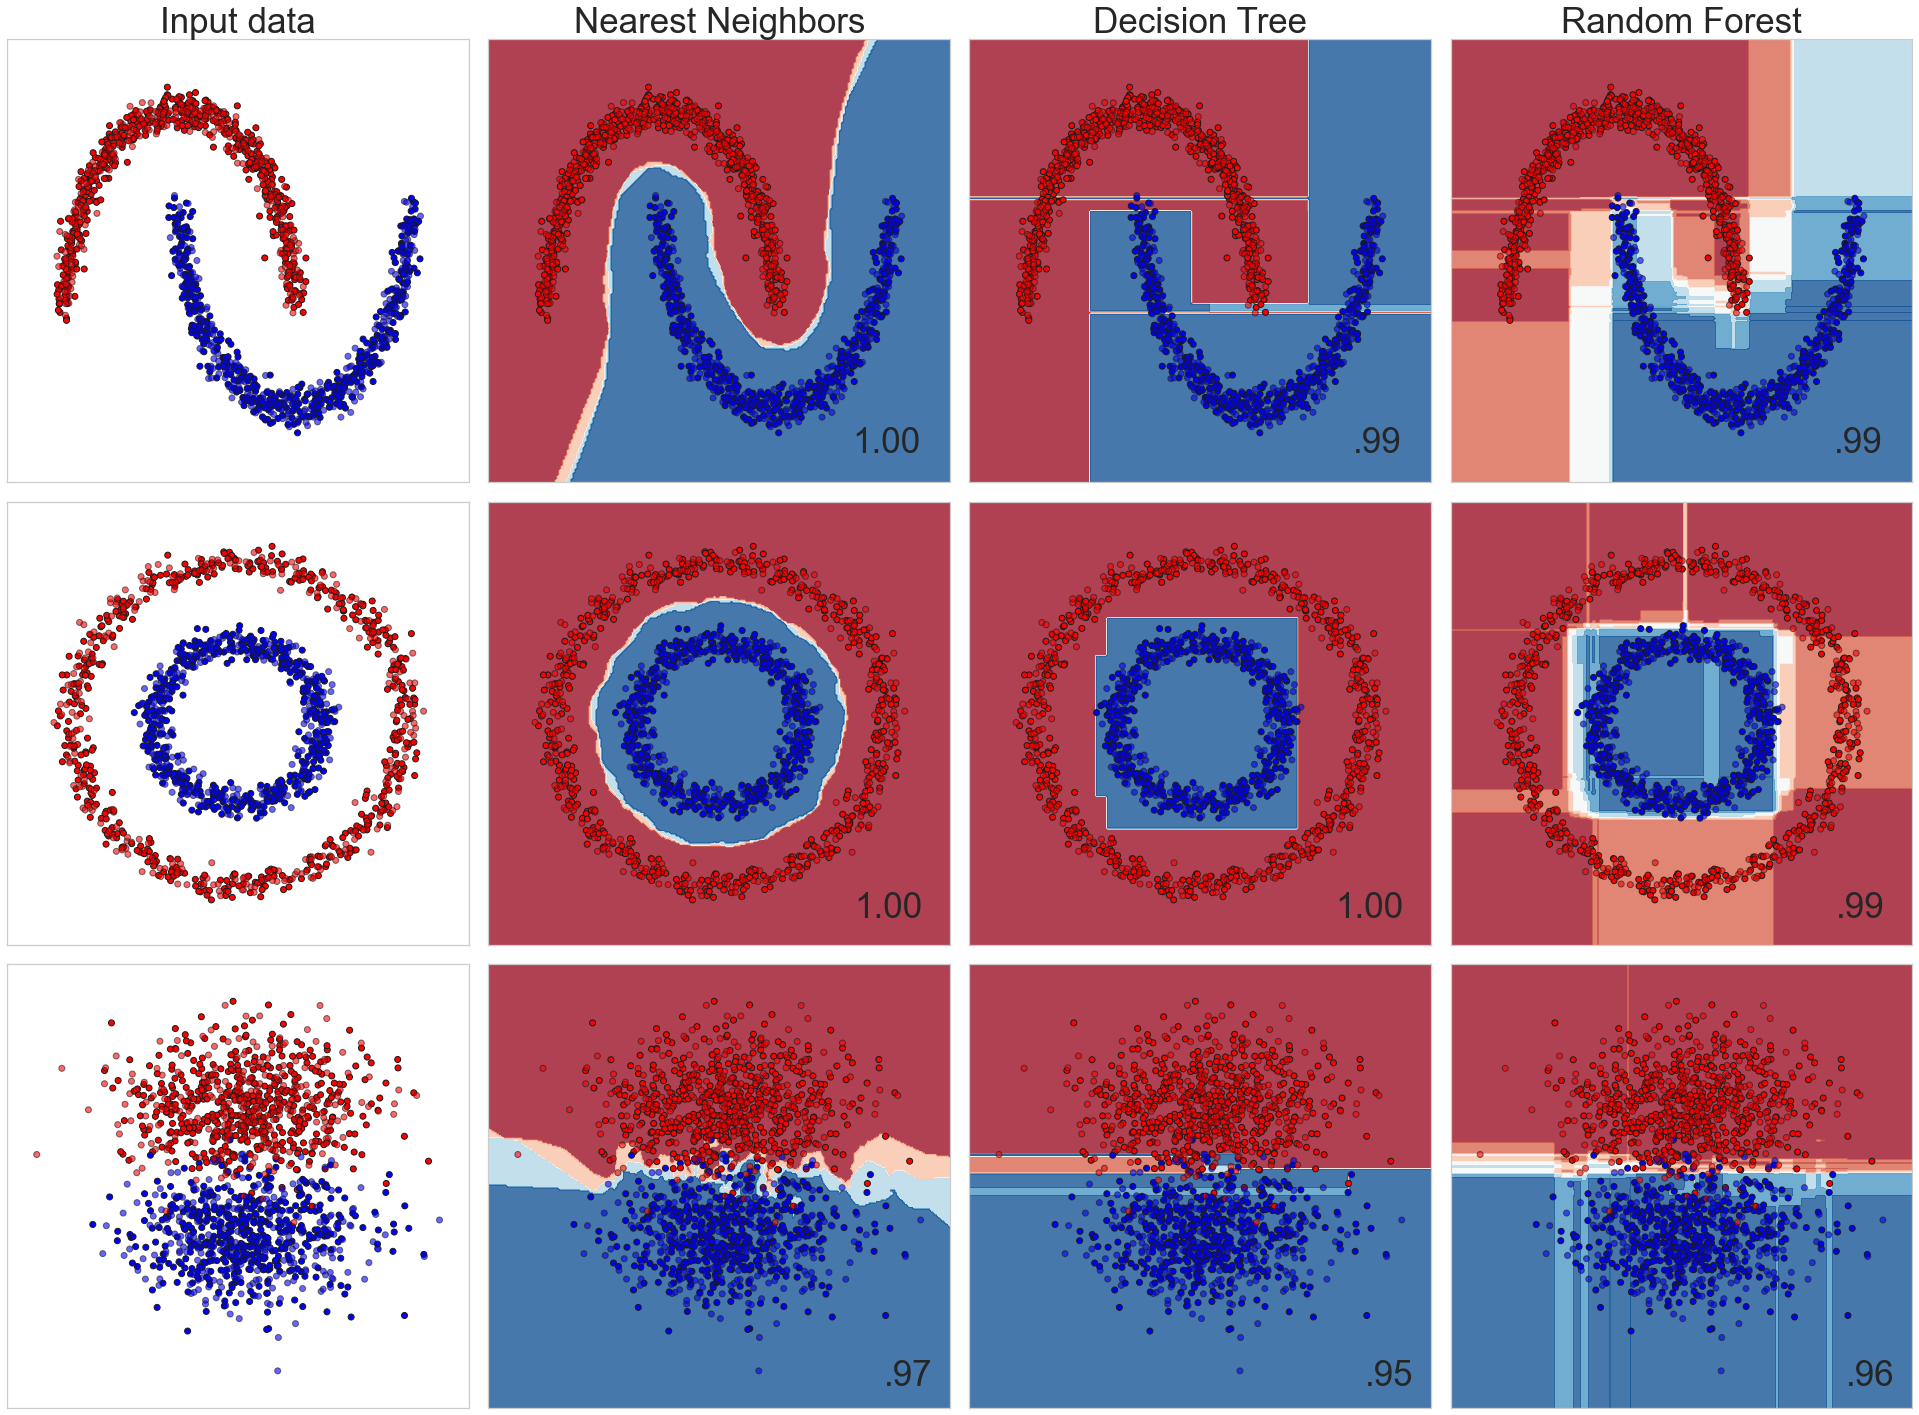

In [54]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

h = 0.02  # step size in the mesh

n_samples = 1500

names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest"
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

balanced = make_blobs(n_samples=n_samples, random_state=8,centers=2,center_box = (-4,4))



datasets = [
    make_moons(n_samples=n_samples,noise=0.05, random_state=0),
    make_circles(n_samples=n_samples,noise=0.05, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, random_state=8,centers=2,center_box = (-4,4))

]

figure = plt.figure(figsize=(27, 20))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", size = 35)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. 
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, size = 35)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=35,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# Tree & Random Forest in Regression

In [55]:
# DGP
rng = np.random.RandomState(1)
X_train = np.sort(5 * rng.rand(80, 1), axis=0)
y_train = np.sin(X_train).ravel()
y_train[::5] += 3 * (0.5 - rng.rand(16))

rng = np.random.RandomState(10)
X_test = np.sort(5 * rng.rand(40, 1), axis=0)
y_test = np.sin(X_test).ravel()

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor



Mean Squared Error for 1-depth: 0.107835
R2 Score for 1-depth: 0.728414
Mean Squared Error for 3-depth: 0.073480
R2 Score for 3-depth: 0.814939
Mean Squared Error for 5-depth: 0.208359
R2 Score for 5-depth: 0.475241
Mean Squared Error for 10-depth: 0.216942
R2 Score for 10-depth: 0.453624


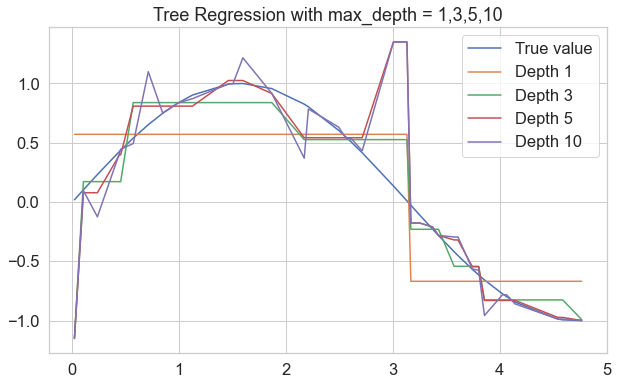

In [57]:
reg = DecisionTreeRegressor(max_depth = 1).fit(X_train, y_train)
y_pred_1 = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
print("Mean Squared Error for 1-depth: %f" %(MSE))
print("R2 Score for 1-depth: %f" %(r2))

reg = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred_3 = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_3)
r2= r2_score(y_test, y_pred_3)
print("Mean Squared Error for 3-depth: %f" %(MSE))
print("R2 Score for 3-depth: %f" %(r2))

reg = DecisionTreeRegressor(max_depth = 5).fit(X_train, y_train)
y_pred_5 = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_5)
r2 = r2_score(y_test, y_pred_5)
print("Mean Squared Error for 5-depth: %f" %(MSE))
print("R2 Score for 5-depth: %f" %(r2))

reg = DecisionTreeRegressor(max_depth = 10).fit(X_train, y_train)
y_pred_10 = reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_10)
r2 = r2_score(y_test, y_pred_10)
print("Mean Squared Error for 10-depth: %f" %(MSE))
print("R2 Score for 10-depth: %f" %(r2))


plt.figure(figsize = (10,6))
ax = plt.gca()
ax.plot(X_test, y_test,label = 'True value')
ax.plot(X_test,y_pred_1,label = 'Depth 1')
ax.plot(X_test,y_pred_3,label = 'Depth 3')
ax.plot(X_test,y_pred_5,label = 'Depth 5')
ax.plot(X_test,y_pred_10,label = 'Depth 10')
ax.legend()

plt.title("Tree Regression with max_depth = 1,3,5,10")
plt.show()




# Random Forest and Feature Importance

In [58]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [59]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [60]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

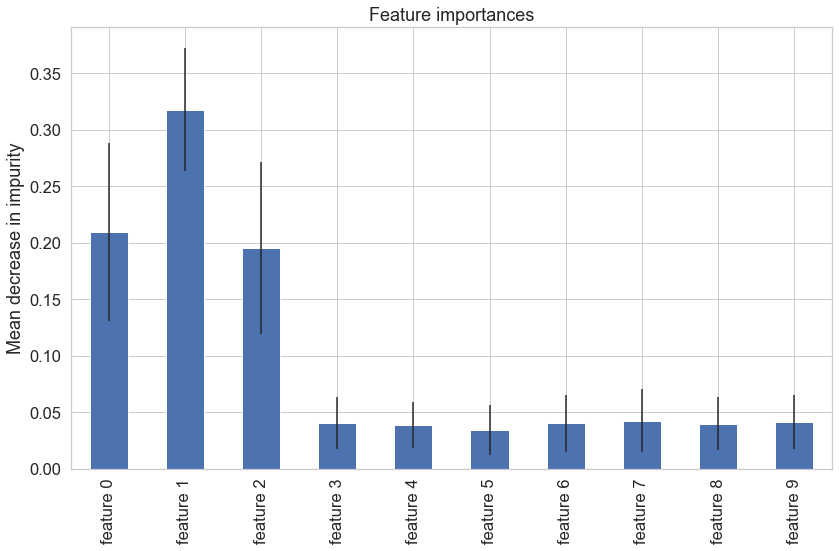

In [61]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax,figsize = (12,8))
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Breast Cancer

In [62]:
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
X = pd.DataFrame(X, columns = data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.97


In [67]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
print("Accuracy on test data: %f" %(clf.score(X_test, y_test)))

Accuracy on test data: 0.895105


In [73]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("logistic_score: %f" % (score))

logistic_score: 0.965035


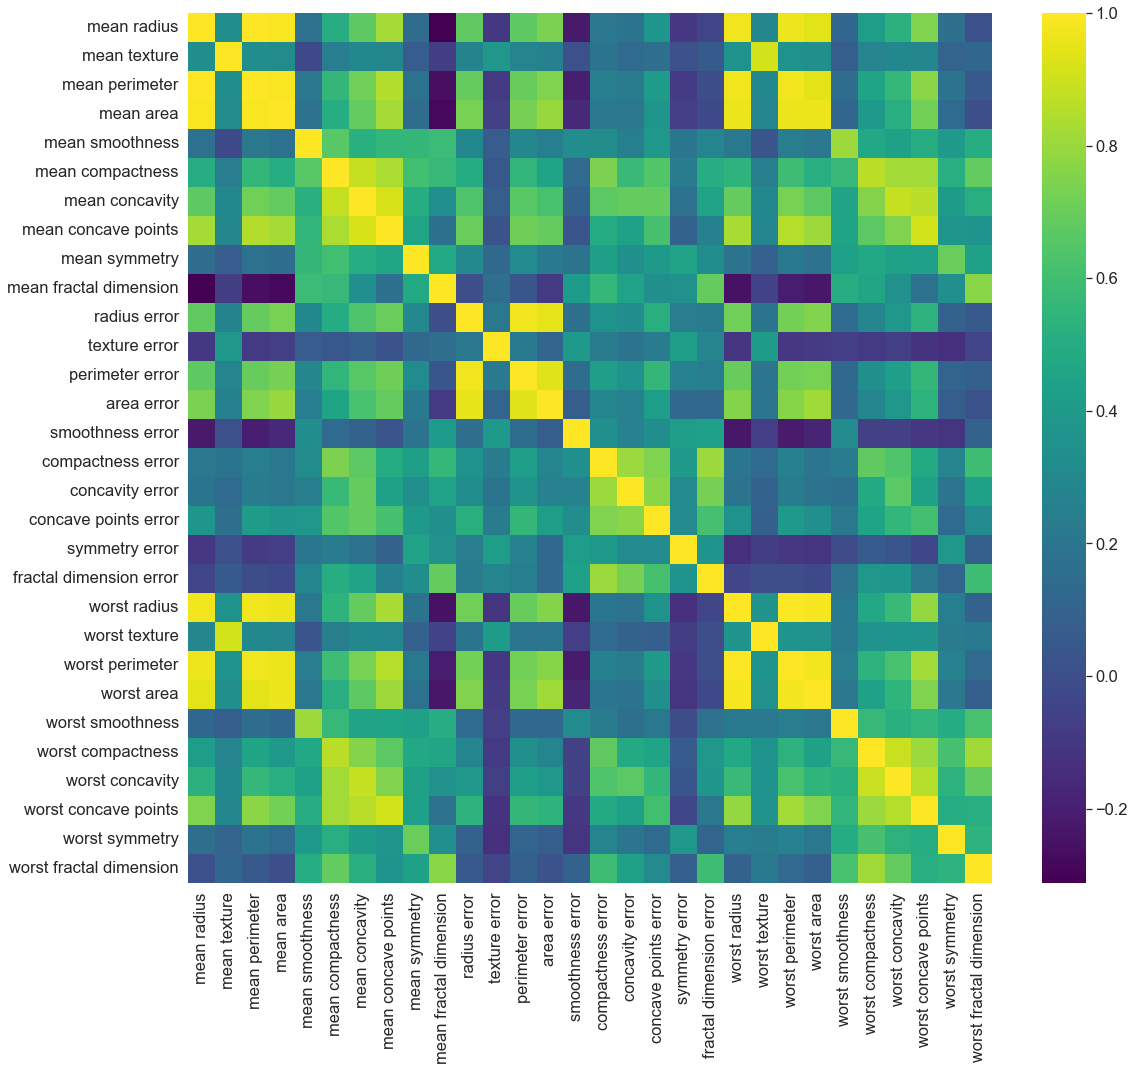

In [64]:
plt.figure(figsize=(18, 16))
sns.heatmap(X.corr(), annot=False, cmap='viridis')

plt.show()

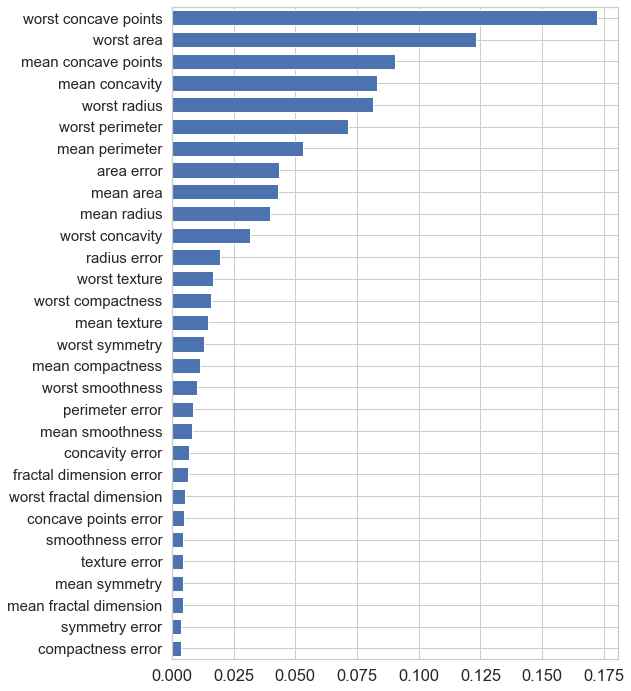

In [65]:
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1,figsize=(8, 12))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx], size = 15)
ax1.set_ylim((0, len(clf.feature_importances_)))

plt.show()

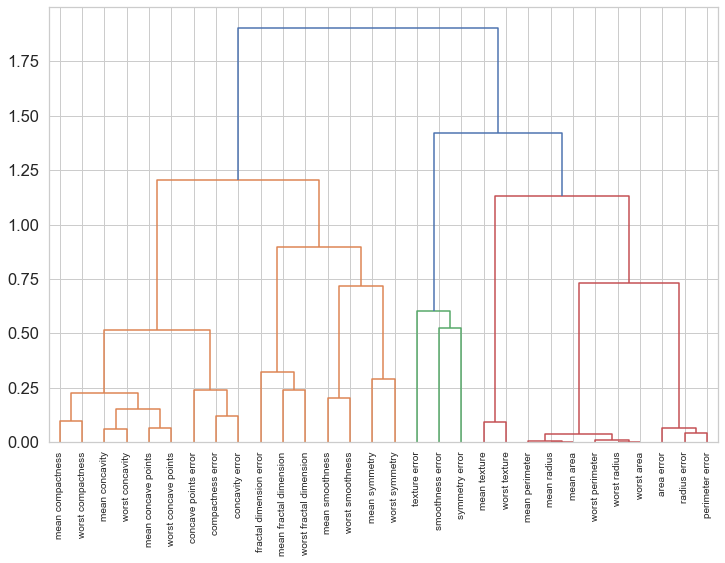

In [78]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


fig, (ax1) = plt.subplots(1, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=data.feature_names.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))